Bell Inequality Violation (CHSH Test)

In [3]:
!pip install qiskit --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Pauli
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# --- Step 1: Create the Bell state |Φ+> = (|00> + |11>)/√2
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
psi = Statevector.from_instruction(qc)


In [6]:
# --- Step 2: Define measurement settings (angles for A, A', B, B')
# CHSH optimal settings
a = 0.0
ap = np.pi / 4
b = np.pi / 8
bp = -np.pi / 8



In [7]:
# --- Step 3: Define Pauli matrices
I = np.eye(2)
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Measurement operator for an angle θ: A(θ) = cos(2θ)Z + sin(2θ)X
def A(theta):
    return np.cos(2*theta) * Z + np.sin(2*theta) * X


In [8]:
# --- Step 4: Compute the CHSH correlation ⟨A ⊗ B⟩ for all settings
def expectation(theta_a, theta_b):
    A_op = A(theta_a)
    B_op = A(theta_b)
    op = np.kron(A_op, B_op)
    return np.real(np.vdot(psi.data, op @ psi.data))

E_ab = expectation(a, b)
E_abp = expectation(a, bp)
E_apb = expectation(ap, b)
E_apbp = expectation(ap, bp)



In [9]:
# --- Step 5: Compute CHSH parameter S
S = E_ab + E_abp + E_apb - E_apbp



In [10]:
# --- Step 6: Display results
print("Expectation values:")
print(f"E(a,b)   = {E_ab:.4f}")
print(f"E(a,b')  = {E_abp:.4f}")
print(f"E(a',b)  = {E_apb:.4f}")
print(f"E(a',b') = {E_apbp:.4f}")
print("\nCHSH parameter:")
print(f"S = {S:.4f}")
print("Classical bound: |S| ≤ 2")
print("Quantum bound: |S| ≤ 2√2 ≈ 2.828")



Expectation values:
E(a,b)   = 0.7071
E(a,b')  = 0.7071
E(a',b)  = 0.7071
E(a',b') = -0.7071

CHSH parameter:
S = 2.8284
Classical bound: |S| ≤ 2
Quantum bound: |S| ≤ 2√2 ≈ 2.828


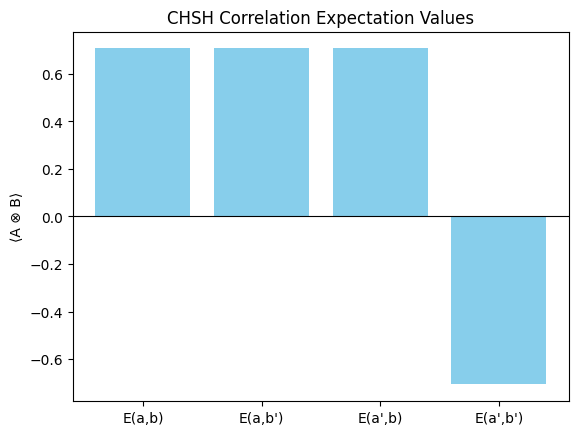

In [11]:
# --- Step 7 (Optional): Plot expectation values
labels = ["E(a,b)", "E(a,b')", "E(a',b)", "E(a',b')"]
values = [E_ab, E_abp, E_apb, E_apbp]

plt.bar(labels, values, color="skyblue")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("CHSH Correlation Expectation Values")
plt.ylabel("⟨A ⊗ B⟩")
plt.show()